In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
#import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt

In [2]:
dfBar = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
dfBar

,a,b,c,d
0,-0.599112,0.153298,0.103932,0.220038
1,-0.567509,0.681837,-0.928365,-0.317606
2,1.149000,0.140369,-1.583829,2.037019
3,-2.063767,-0.357906,1.710022,-0.073030
4,-0.741957,0.255552,-0.835574,-1.492522
5,-0.035884,-1.113308,-0.867832,1.150521
6,-0.953750,1.038831,-0.374274,0.689480
7,0.027316,-1.794099,1.014556,-0.907055
8,-0.147013,-0.270666,-0.796273,1.006868
9,-1.093401,0.505167,0.071373,0.020346


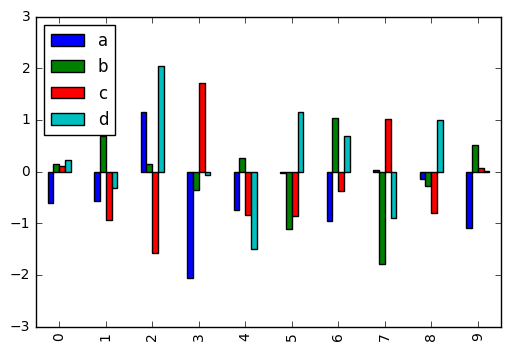

In [3]:
dfBar.plot(kind='bar')
plt.show()

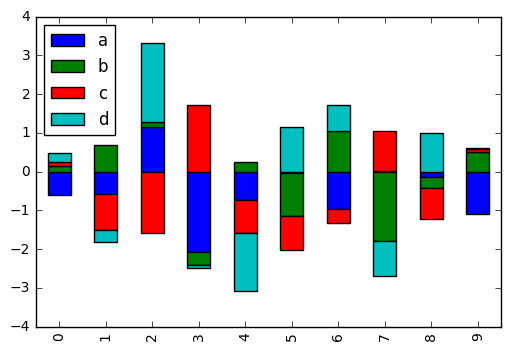

In [4]:
dfBar.plot(kind='bar', stacked=True)
plt.show()

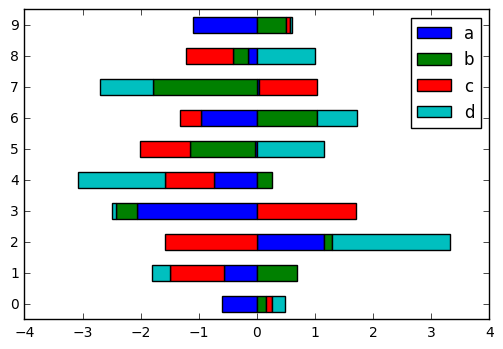

In [5]:
dfBar.plot(kind='barh', stacked=True)
plt.show()


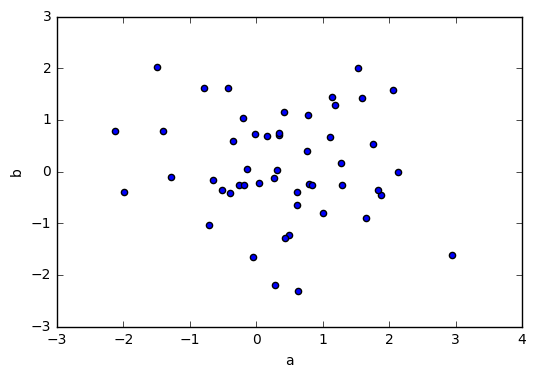

In [6]:
dfScatter = pd.DataFrame(np.random.randn(50, 4), columns=['a', 'b', 'c', 'd'])
dfScatter.plot(kind='scatter', x='a', y='b');
plt.show()

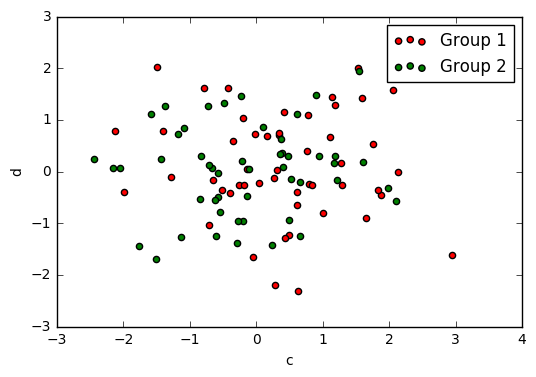

In [7]:
ax = dfScatter.plot(kind='scatter', x='a', y='b',
             color='Red', label='Group 1');
dfScatter.plot(kind='scatter', x='c', y='d',
         color='Green', label='Group 2', ax=ax);# ax=ax is the connection

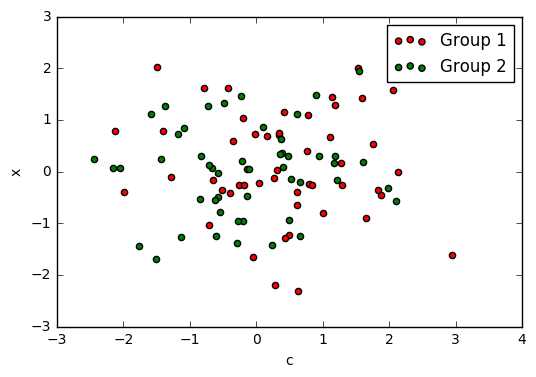

In [8]:
ax = dfScatter.plot(kind='scatter', x='a', y='b',
             color='Red', label='Group 1');
dfScatter.plot(kind='scatter', x='c', y='d',
         color='Green', label='Group 2', ax=ax);
ax.set_ylabel("y")
ax.set_ylabel("x")



In [9]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994',
'2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071',
'2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592',
'2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109',
'2014-05-04 18:47:05.436523', '2014-05-10 18:47:05.486877'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
df.dtypes

date             object
battle_deaths     int64
dtype: object

In [10]:
#Convert df['date'] from string to datetime:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.dtypes

date             datetime64[ns]
battle_deaths             int64
dtype: object

In [12]:
#Convert df['date'] from string to datetime:
df['date'] = pd.to_datetime(df['date'])

In [13]:
#Set df['date'] as the index and delete the column:  # df.ix['2014'] this will return only the index of 2014 
#if we have 2015, it will not return it. but df.index will return every element in variable date

df.index = df['date']
del df['date']
df

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [14]:
#Find the total value of battle_deaths per day:
#resample creates a pivot table of the time series data---do the aggregate by day('D'),month('m') and so on
df.resample('D').sum() #use df.resample('D').sum().dropna() in case there are gap in the time

,battle_deaths
date,
2014-05-01,59.0
2014-05-02,70.0
2014-05-03,51.0
2014-05-04,62.0
2014-05-05,NaN
2014-05-06,NaN
2014-05-07,NaN
2014-05-08,NaN
2014-05-09,NaN


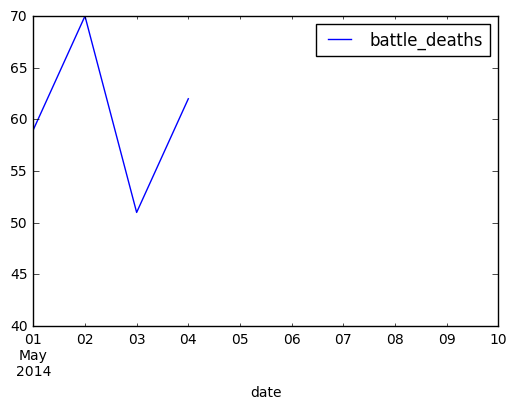

In [15]:
df.resample('D').sum().plot()